In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

import benji_utils as utils
import bbbfs_algorithms as bbbfa

import networkit as nk
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from scipy.stats.mstats import winsorize
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [19]:
dfs = []
from tqdm import tqdm

# graphs = np.random.choice(utils.input_names_real, 1000)

algo_name_map = {
    'python-BiBFS_Layerbalanced': 'LB',
    'python-BiBFS_LayerbalancedFull': 'LBF',
    'python-BiBFS_VertexBalancedApproximate': 'VBA',
    'python-BiBFS_ExactExpandSmallerQueue': 'VBSQ',
    'python-BiBFS_ExactExpandSmallerQueueBetter': 'VBSQB',
    'python-BiBFS_ExactCheckDirectEdges': 'VBDE',
    'python-BiBFS_EdgeBalancedApproximate': 'EBA',
}

for graph_name in tqdm(utils.input_names_all):
    try:
        resultsdf = pd.read_csv(f'../output_data/rplot_dist/{graph_name}.csv')
        resultsdf['graph'] = graph_name
        resultsdf['algo'] = resultsdf['algo'].apply(lambda x: algo_name_map[x])
        dfs.append(resultsdf)
    except Exception as e:
        pass

df = pd.concat(dfs)

100%|██████████| 5487/5487 [00:06<00:00, 826.29it/s]


In [22]:
df.to_csv('../output_data/rplot_dist.csv', index=False)

In [23]:
df.algo.unique()

array(['LB', 'LBF', 'VBA', 'VBSQB', 'VBSQ', 'VBDE', 'EBA'], dtype=object)

In [32]:
(df.loc[(df.algo == 'VBA') & (df.graph == '130bit')].search_space.mean()
,df.loc[(df.algo == 'VBSQ') & (df.graph == '130bit')].search_space.mean()
)

(32.49, 1085.92)

In [29]:
df.graph.unique()

array(['08blocks', '1138_bus', '130bit', ..., 'webkb-wisc', 'wing',
       'wing_nodal'], dtype=object)

In [2]:
dfs = []
from tqdm import tqdm

# graphs = np.random.choice(utils.input_names_real, 1000)

for graph_name in tqdm(utils.input_names_real):
    try:
        resultsdf = utils.graph_name_to_resultsdf(graph_name)
        dfs.append(resultsdf)
    except Exception as e:
        pass

df = pd.concat(dfs)

100%|██████████| 2977/2977 [00:14<00:00, 201.40it/s]


In [15]:
utils.df_stats.loc[utils.df_stats.graph.str.contains("DD")]

,graph,n,m,degeneracy,clustering_coeff,closure_weak,time_closure_weak,closure,algo,avg_dist,sample_size,actual_sample_size,seed,time_avg_dist,avg_detour_dist,avg_deg_locality
49,DD_g1,327,899,4.0,0.520211,5.0,2.390960,5.0,weighted,8.17262,400,327,1131761279,3.417080,2.23137,0.590532
50,DD_g10,146,328,4.0,0.481316,4.0,0.642709,5.0,weighted,7.05470,400,146,2867912287,0.943209,2.55728,0.568473
51,DD_g100,349,1005,4.0,0.523248,5.0,2.182370,6.0,weighted,7.86090,400,349,721861175,4.070750,2.12139,0.581721
52,DD_g1000,183,408,4.0,0.443414,4.0,0.737709,5.0,weighted,7.61406,400,183,1970367390,0.983875,2.35572,0.528192
53,DD_g1001,88,203,4.0,0.512933,4.0,0.584667,5.0,weighted,6.16641,400,88,2675918438,0.230750,2.45320,0.596305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,DD_g995,103,287,4.0,0.516358,4.0,0.526875,5.0,weighted,4.67371,400,103,1415440872,0.265125,2.10453,0.567546
1221,DD_g996,114,242,3.0,0.384935,3.0,0.814625,4.0,weighted,5.73498,400,114,3102633647,0.409958,2.45833,0.446111
1222,DD_g997,743,1753,4.0,0.511709,4.0,2.278620,5.0,weighted,15.05610,400,482,244691158,10.434300,2.45860,0.582988
1223,DD_g998,523,1465,4.0,0.499816,4.0,2.749000,5.0,weighted,9.74604,400,460,1577245190,5.146630,2.12150,0.560293


In [8]:
resultsdf

,s,t,algo,search_space,dist,time_dist,graph
0,1443,5928,LB,1147,7,0.000868,wing_nodal
1,2504,10739,LB,19876,12,0.011838,wing_nodal
2,311,4193,LB,29433,17,0.018096,wing_nodal
3,2093,8624,LB,13846,12,0.008433,wing_nodal
4,7218,9345,LB,32945,14,0.019554,wing_nodal
...,...,...,...,...,...,...,...
9995,7601,9236,EBA,285,4,0.001179,wing_nodal_cl
9996,2646,8837,EBA,139,4,0.000596,wing_nodal_cl
9997,6807,7905,EBA,153,4,0.000641,wing_nodal_cl
9998,3155,5169,EBA,87,4,0.000385,wing_nodal_cl


In [7]:
len(utils.input_names_all)

5487

In [3]:
import importlib
importlib.reload(bbbfa)

<module 'bbbfs_algorithms' from '/Users/benjidayan/coding/external-validity/benji/bbbfs_algorithms.py'>

In [4]:
importlib.reload(utils)


<module 'benji_utils' from '/Users/benjidayan/coding/external-validity/benji/benji_utils.py'>

<AxesSubplot:>

<AxesSubplot:>

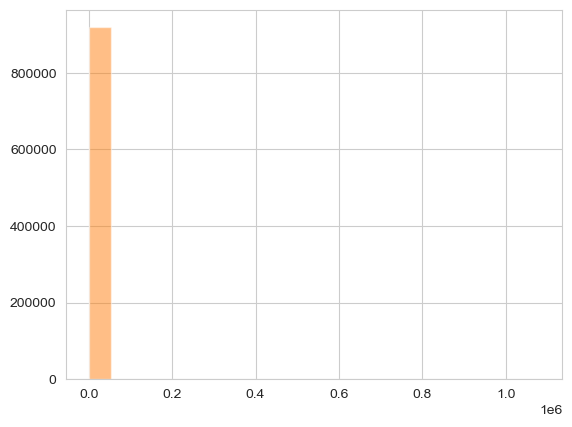

In [10]:
# df.loc[(df.algo == 'VBA') & (df.graph.str.contains('_cl')),
#        'search_space'].hist(bins=20)

# df.loc[(df.algo == 'VBA') & (~df.graph.str.contains('_cl')),
#        'search_space'].hist(bins=20)

# one blocks out the other so we can't see both. Instead:
df.loc[(df.algo == 'VBA') & (df.graph.str.contains('_cl')),
       'search_space'].hist(bins=20, alpha=0.5)
df.loc[(df.algo == 'VBA') & (~df.graph.str.contains('_cl')),
       'search_space'].hist(bins=20, alpha=0.5)

# same again but we force the two series to share the same bin widths
# df.loc[(df.algo == 'VBA') & (df.graph.str.contains('_cl')),
#        'search_space'].hist(bins=20, alpha=0.5, density=True)
# df.loc[(df.algo == 'VBA') & (~df.graph.str.contains('_cl')),
#        'search_space'].hist(bins=20, alpha=0.5, density=True)

In [3]:
graph_algo_medians = df.groupby(['graph', 'algo']).search_space.median()
graph_algo_medians = graph_algo_medians.reset_index()
graph_algo_medians = pd.merge(graph_algo_medians, utils.df_stats.loc[:, ['graph', 'm']], on='graph', how='left')
# transfer .m from graph X to graph X_cl
graph_algo_medians.loc[graph_algo_medians.graph.str.contains('_cl'), 'm'] = graph_algo_medians.loc[~graph_algo_medians.graph.str.contains('_cl'), 'm'].values

graph_algo_medians['search_space_fraction'] = graph_algo_medians['search_space'] / graph_algo_medians['m']

In [4]:
graph_algo_medians['search_space_fraction'] = graph_algo_medians['search_space'] / graph_algo_medians['m']

In [5]:
graph_algo_medians.head(20)

,graph,algo,search_space,m,search_space_fraction
0,130bit,EBA,21.0,6058.0,0.003466
1,130bit,LB,21.0,6058.0,0.003466
2,130bit,VBA,21.0,6058.0,0.003466
3,130bit,VBDE,21.0,6058.0,0.003466
4,130bit,VBSQ,1078.5,6058.0,0.178029
5,130bit_cl,EBA,18.0,6058.0,0.002971
6,130bit_cl,LB,21.0,6058.0,0.003466
7,130bit_cl,VBA,21.0,6058.0,0.003466
8,130bit_cl,VBDE,21.0,6058.0,0.003466
9,130bit_cl,VBSQ,1241.0,6058.0,0.204853


<AxesSubplot:>

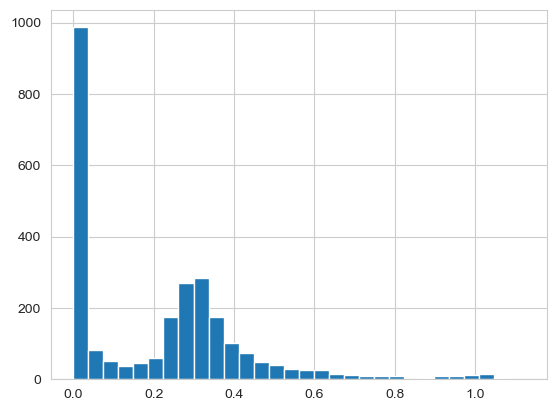

In [6]:
gams = graph_algo_medians
gams = gams.loc[~gams.graph.str.contains('_cl')]
gams_cl = graph_algo_medians.loc[graph_algo_medians.graph.str.contains('_cl')]
gams.reset_index(drop=True, inplace=True)
gams_cl.reset_index(drop=True, inplace=True)
gams.loc[gams.algo == 'EBA'].search_space_fraction.hist(bins=30)

In [7]:
gams.loc[gams.algo == 'VBA'].head(10)
gams_cl.loc[gams_cl.algo == 'VBA'].head(10)

,graph,algo,search_space,m,search_space_fraction
2,130bit_cl,VBA,21.0,6058.0,0.003466
7,145bit_cl,VBA,19.0,11251.0,0.001689
12,162bit_cl,VBA,33.5,37069.0,0.000904
17,176bit_cl,VBA,41.0,82204.0,0.000499
22,192bit_cl,VBA,42.0,154235.0,0.000272
27,208bit_cl,VBA,22.0,299684.0,0.000073
32,2D_27628_bjtcai_cl,VBA,280.0,207723.0,0.001348
37,2D_54019_highK_cl,VBA,319.0,472098.0,0.000676
42,2cubes_sphere_cl,VBA,568.5,772886.0,0.000736
47,3D_28984_Tetra_cl,VBA,232.5,288684.0,0.000805


In [8]:
gams_by_algos = {algo: gams.loc[gams.algo == algo] for algo in gams.algo.unique()}
gams_by_algos
ssf_by_algos = {algo: gams_by_algos[algo].search_space_fraction.reset_index(drop=True) for algo in gams.algo.unique()}
ss_by_algos = {algo: gams_by_algos[algo].search_space.reset_index(drop=True) for algo in gams.algo.unique()}

ssf_by_algos_cl = {algo: gams_cl.loc[gams_cl.algo == algo].search_space_fraction.reset_index(drop=True) for algo in gams.algo.unique()}
ss_by_algos_cl = {algo: gams_cl.loc[gams_cl.algo == algo].search_space.reset_index(drop=True) for algo in gams.algo.unique()}#

x = gams_by_algos['VBA'].reset_index(drop=True).m


Text(0.5, 1.0, 'Histogram of real graphs by edges')

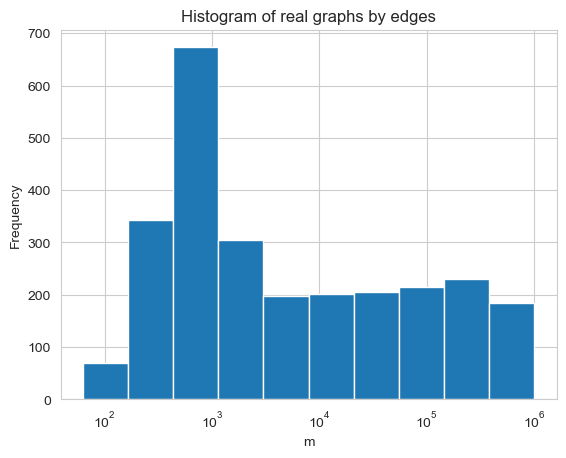

In [9]:
hist, bins = np.histogram(x, bins=10)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(x, bins=logbins)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('Frequency')
plt.title('Histogram of real graphs by edges')

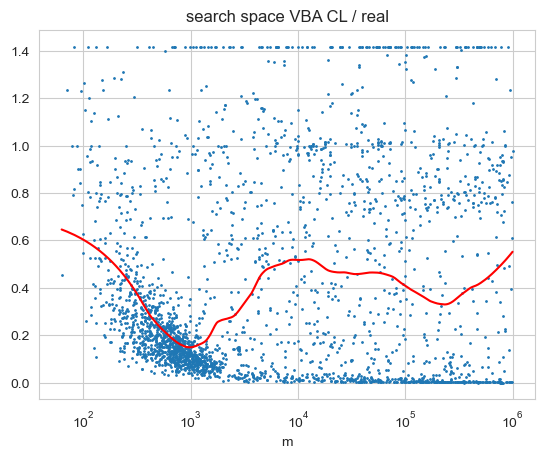

In [12]:
y = ss_by_algos_cl['VBA'] / ss_by_algos['VBA']
y = winsorize(y, limits=[0, 0.05])
plt.scatter(x, y, s=1)
plt.xscale('log')
plt.xlabel('m')
plt.title('search space VBA CL / real')

z = lowess(y, x, frac=0.3)
plt.plot(z[:, 0], z[:, 1], 'red')


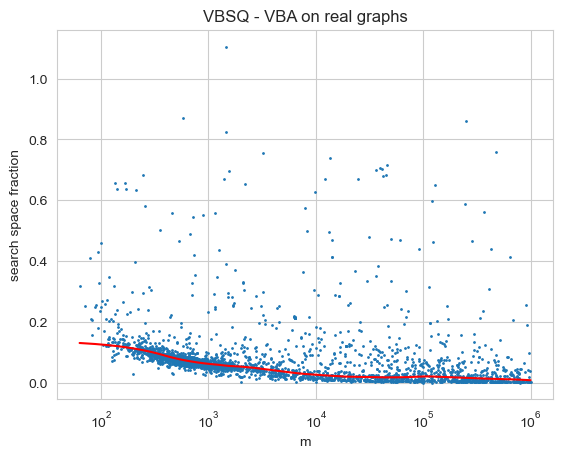

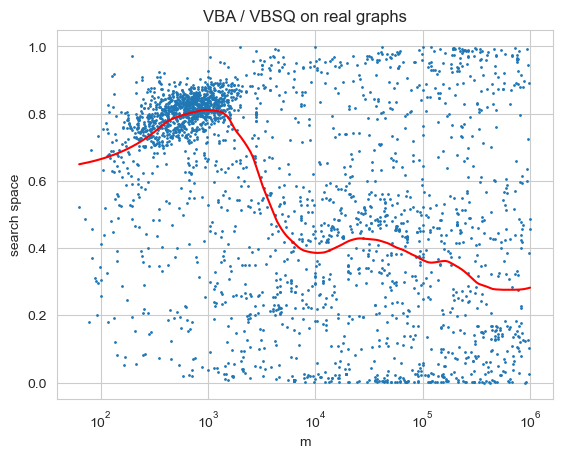

In [34]:
y = ssf_by_algos['VBSQ'] - ssf_by_algos['VBA']

plt.scatter(x, y, s=1)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('search space fraction')
plt.title('VBSQ - VBA on real graphs')
z = lowess(y, x, frac=0.3)
plt.plot(z[:, 0], z[:, 1], 'red')

plt.figure()
y = ss_by_algos['VBA'] / ss_by_algos['VBSQ']
# y = winsorize(y, limits=[0, 0.05])

plt.scatter(x, y, s=1)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('search space')
plt.title('VBA / VBSQ on real graphs')
z = lowess(y, x, frac=0.3)
plt.plot(z[:, 0], z[:, 1], 'red')

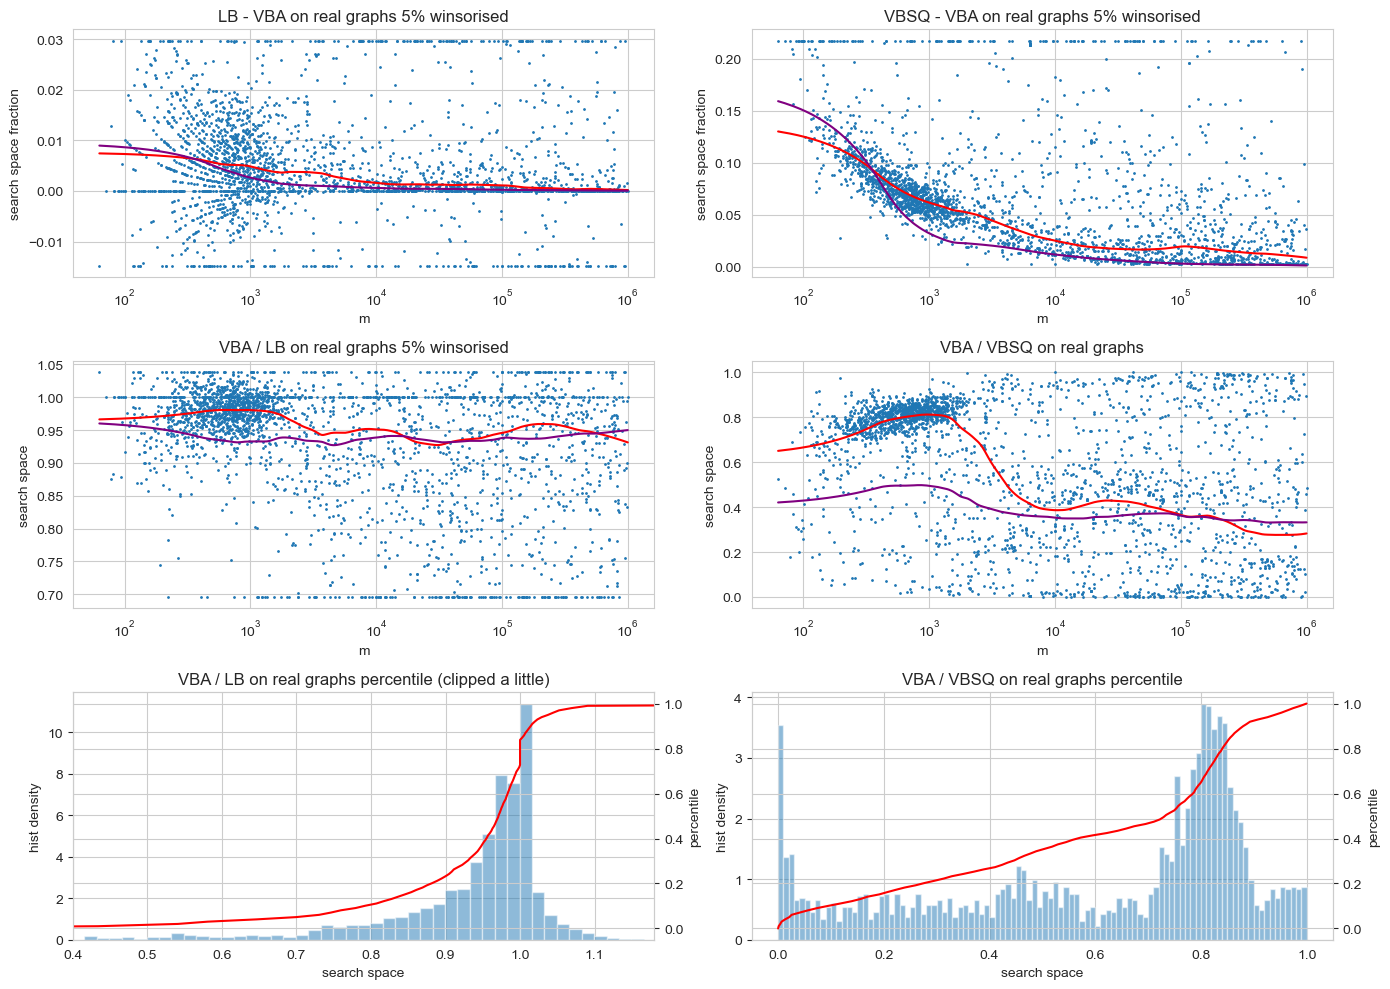

In [65]:
ig, axs = plt.subplots(3, 2, figsize=(14, 10))


y = ssf_by_algos['LB'] - ssf_by_algos['VBA']
y = winsorize(y, limits=[0.05, 0.05])
axs[0, 0].scatter(x, y, s=1)
axs[0, 0].set_xscale('log')
axs[0, 0].set_xlabel('m')
axs[0, 0].set_ylabel('search space fraction')
axs[0, 0].set_title('LB - VBA on real graphs 5% winsorised')
z = lowess(y, x, frac=0.3)
axs[0, 0].plot(z[:, 0], z[:, 1], 'red')

z = lowess(ssf_by_algos_cl['LB'] - ssf_by_algos_cl['VBA'], x, frac=0.3)
axs[0, 0].plot(z[:, 0], z[:, 1], 'purple')


y = ss_by_algos['VBA'] / ss_by_algos['LB']
y = winsorize(y, limits=[0.05, 0.05])
axs[1, 0].scatter(x, y, s=1)
axs[1, 0].set_xscale('log')
axs[1, 0].set_xlabel('m')
axs[1, 0].set_ylabel('search space')
axs[1, 0].set_title('VBA / LB on real graphs 5% winsorised')
z = lowess(y, x, frac=0.3)
axs[1, 0].plot(z[:, 0], z[:, 1], 'red')

z = lowess(ss_by_algos_cl['VBA'] / ss_by_algos_cl['LB'], x, frac=0.3)
axs[1, 0].plot(z[:, 0], z[:, 1], 'purple')



y = ss_by_algos['VBA']  / ss_by_algos['LB']
axs[2, 0].hist(y, bins=100, alpha=0.5, density=True)
axs[2,0].set_ylabel('hist density')
axs[2,0].set_xlabel('search space')
# plt.scatter([0.5, 0.5], [0, 1], color='red')
search_fraction_for_perc = np.percentile(y, np.linspace(0, 100, 100))
# plot this on the same plot but with a different scale

ax2 = axs[2, 0].twinx()
ax2.plot(search_fraction_for_perc, np.linspace(0, 1, 100), color='red')
ax2.set_ylabel('percentile')

# Set title for the plot
axs[2,0].set_title('VBA / LB on real graphs percentile (clipped a little)')

axs[2,0].set_xlim(0.1, 1.25)
ax2.set_xlim(0.4, 1.18)



y = ssf_by_algos['VBSQ'] - ssf_by_algos['VBA']
y = winsorize(y, limits=[0.05, 0.05])
axs[0, 1].scatter(x, y, s=1)
axs[0, 1].set_xscale('log')
axs[0, 1].set_xlabel('m')
axs[0, 1].set_ylabel('search space fraction')
axs[0, 1].set_title('VBSQ - VBA on real graphs 5% winsorised')
z = lowess(y, x, frac=0.3)
axs[0, 1].plot(z[:, 0], z[:, 1], 'red')

z = lowess(ssf_by_algos_cl['VBSQ'] - ssf_by_algos_cl['VBA'], x, frac=0.3)
axs[0, 1].plot(z[:, 0], z[:, 1], 'purple')

y = ss_by_algos['VBA'] / ss_by_algos['VBSQ']
axs[1, 1].scatter(x, y, s=1)
axs[1, 1].set_xscale('log')
axs[1, 1].set_xlabel('m')
axs[1, 1].set_ylabel('search space')
axs[1, 1].set_title('VBA / VBSQ on real graphs')
z = lowess(y, x, frac=0.3)
axs[1, 1].plot(z[:, 0], z[:, 1], 'red')

z = lowess(ss_by_algos_cl['VBA'] / ss_by_algos_cl['VBSQ'], x, frac=0.3)
axs[1, 1].plot(z[:, 0], z[:, 1], 'purple')



y = ss_by_algos['VBA'] / ss_by_algos['VBSQ']
axs[2, 1].hist(y, bins=100, alpha=0.5, density=True)
axs[2,1].set_ylabel('hist density')
axs[2,1].set_xlabel('search space')
# plt.scatter([0.5, 0.5], [0, 1], color='red')
search_fraction_for_perc = np.percentile(y, np.linspace(0, 100, 100))
# plot this on the same plot but with a different scale

ax2 = axs[2, 1].twinx()
ax2.plot(search_fraction_for_perc, np.linspace(0, 1, 100), color='red')
ax2.set_ylabel('percentile')

# Set title for the plot
axs[2,1].set_title('VBA / VBSQ on real graphs percentile')



# Adjust layout
plt.tight_layout()
plt.show()

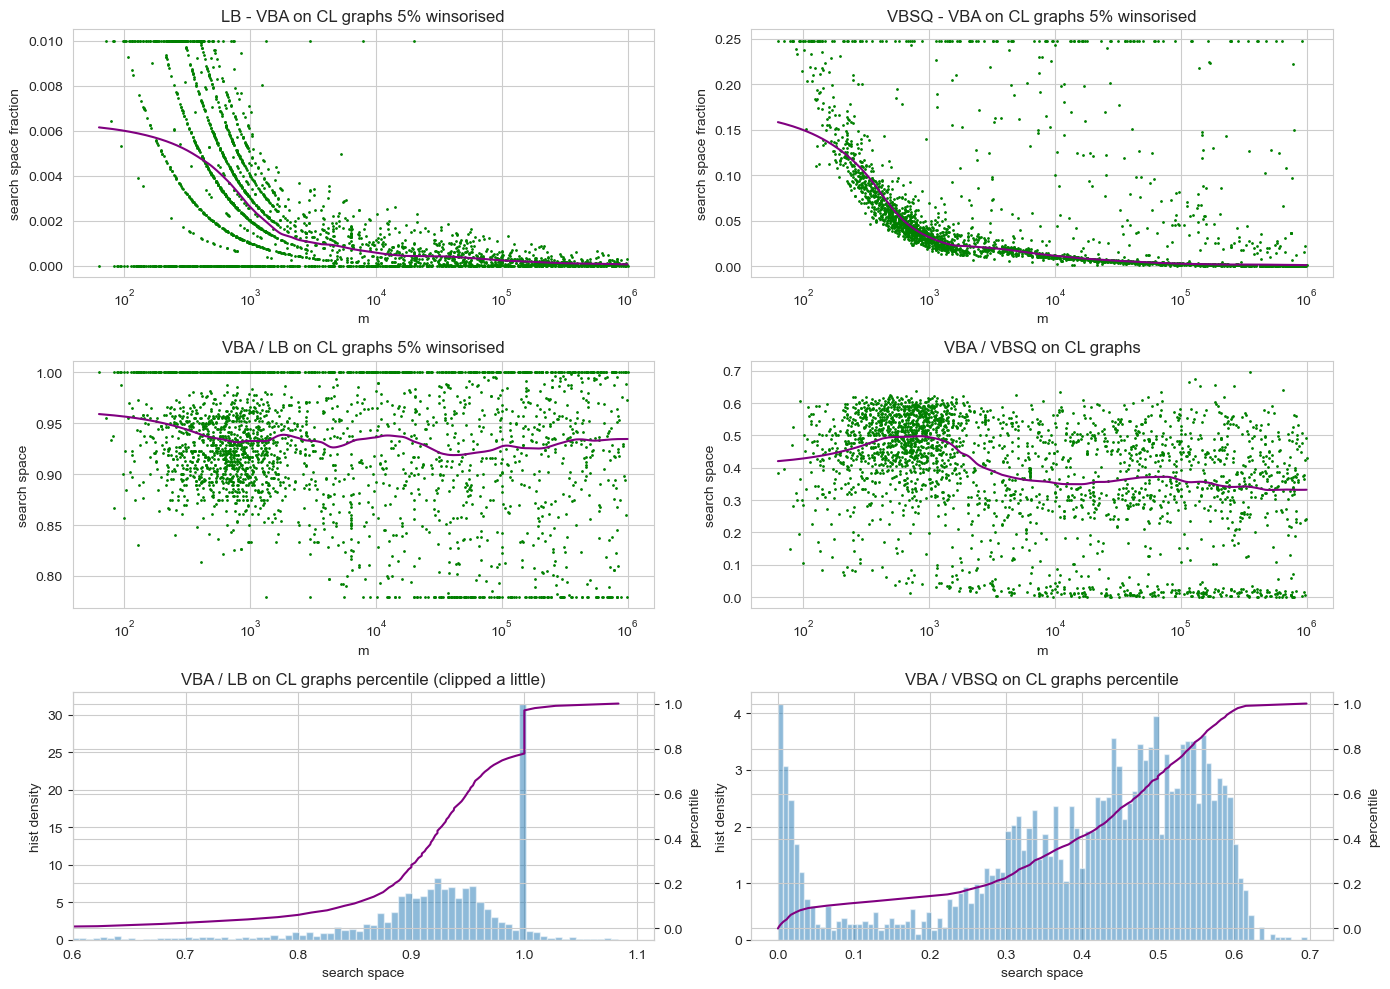

In [69]:


fig, axs = plt.subplots(3, 2, figsize=(14, 10))


y = ssf_by_algos_cl['LB'] - ssf_by_algos_cl['VBA']
y = winsorize(y, limits=[0.05, 0.05])
axs[0, 0].scatter(x, y, s=1, color='green')
axs[0, 0].set_xscale('log')
axs[0, 0].set_xlabel('m')
axs[0, 0].set_ylabel('search space fraction')
axs[0, 0].set_title('LB - VBA on CL graphs 5% winsorised')
z = lowess(y, x, frac=0.3)
axs[0, 0].plot(z[:, 0], z[:, 1], 'purple')


y = ss_by_algos_cl['VBA'] / ss_by_algos_cl['LB']
y = winsorize(y, limits=[0.05, 0.05])
axs[1, 0].scatter(x, y, s=1, color='green')
axs[1, 0].set_xscale('log')
axs[1, 0].set_xlabel('m')
axs[1, 0].set_ylabel('search space')
axs[1, 0].set_title('VBA / LB on CL graphs 5% winsorised')
z = lowess(y, x, frac=0.3)
axs[1, 0].plot(z[:, 0], z[:, 1], 'purple')


y = ss_by_algos_cl['VBA'] / ss_by_algos_cl['LB']
axs[2, 0].hist(y, bins=100, alpha=0.5, density=True)
axs[2,0].set_ylabel('hist density')
axs[2,0].set_xlabel('search space')
# plt.scatter([0.5, 0.5], [0, 1], color='red')
search_fraction_for_perc = np.percentile(y, np.linspace(0, 100, 100))
# plot this on the same plot but with a different scale

ax2 = axs[2, 0].twinx()
ax2.plot(search_fraction_for_perc, np.linspace(0, 1, 100), color='purple')
ax2.set_ylabel('percentile')

axs[2,0].set_title('VBA / LB on CL graphs percentile (clipped a little)')
ax2.set_xlim(0.6)



y = ssf_by_algos_cl['VBSQ'] - ssf_by_algos_cl['VBA']
y = winsorize(y, limits=[0.05, 0.05])
axs[0, 1].scatter(x, y, s=1, color='green')
axs[0, 1].set_xscale('log')
axs[0, 1].set_xlabel('m')
axs[0, 1].set_ylabel('search space fraction')
axs[0, 1].set_title('VBSQ - VBA on CL graphs 5% winsorised')
z = lowess(y, x, frac=0.3)
axs[0, 1].plot(z[:, 0], z[:, 1], 'purple')

y = ss_by_algos_cl['VBA'] / ss_by_algos_cl['VBSQ']
axs[1, 1].scatter(x, y, s=1, color='green')
axs[1, 1].set_xscale('log')
axs[1, 1].set_xlabel('m')
axs[1, 1].set_ylabel('search space')
axs[1, 1].set_title('VBA / VBSQ on CL graphs')
z = lowess(y, x, frac=0.3)
axs[1, 1].plot(z[:, 0], z[:, 1], 'purple')


y = ss_by_algos_cl['VBA'] / ss_by_algos_cl['VBSQ']
axs[2, 1].hist(y, bins=100, alpha=0.5, density=True)
axs[2,1].set_ylabel('hist density')
axs[2,1].set_xlabel('search space')
# plt.scatter([0.5, 0.5], [0, 1], color='red')
search_fraction_for_perc = np.percentile(y, np.linspace(0, 100, 100))

# plot this on the same plot but with a different scale

ax2 = axs[2, 1].twinx()
ax2.plot(search_fraction_for_perc, np.linspace(0, 1, 100), color='purple')
ax2.set_ylabel('percentile')
axs[2,1].set_title('VBA / VBSQ on CL graphs percentile')


# Adjust layout
plt.tight_layout()

plt.show()

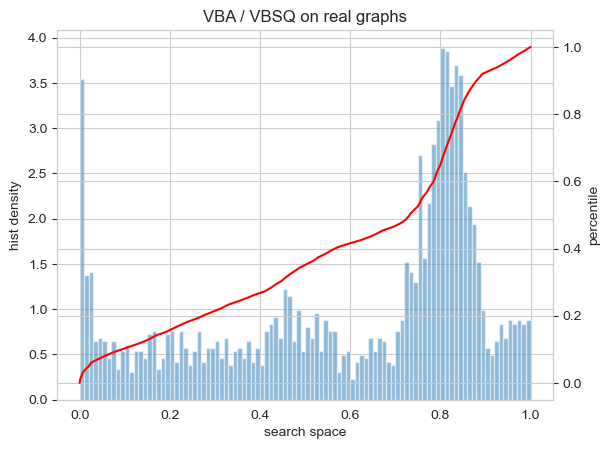

In [42]:
# hist and percentile plot of med_vbsq_minus_vba / med_vbsq all on the same axis
import matplotlib.pyplot as plt
plt.figure()
y = ss_by_algos['VBA']  / ss_by_algos['VBSQ']
_ = plt.hist(y, bins=100, alpha=0.5, density=True)
_ = plt.ylabel('hist density')
plt.xlabel('search space')
# plt.scatter([0.5, 0.5], [0, 1], color='red')
search_fraction_for_perc = np.percentile(y, np.linspace(0, 100, 100))
# plot this on the same plot but with a different scale

plt.twinx()
_ = plt.plot(search_fraction_for_perc, np.linspace(0, 1, 100), color='red')

# plt.plot(4*np.percentile(med_vbsq_minus_vba / med_vbsq, np.linspace(0, 100, 100)))
plt.ylabel('percentile')
plt.title('VBA / VBSQ on real graphs')
plt.show()

In [ ]:
# hist and percentile plot of med_vbsq_minus_vba / med_vbsq all on the same axis
import matplotlib.pyplot as plt
plt.figure()
y = ss_by_algos['VBA']  / ss_by_algos['VBSQ']
_ = plt.hist(med_vbsq_minus_vba / med_vbsq, bins=100, alpha=0.5, density=True)
_ = plt.ylabel('hist density')
plt.xlabel('search space fraction')
# plt.scatter([0.5, 0.5], [0, 1], color='red')
search_fraction_for_perc = np.percentile(med_vbsq_minus_vba / med_vbsq, np.linspace(0, 100, 100))
# plot this on the same plot but with a different scale

plt.twinx()
_ = plt.plot(search_fraction_for_perc, np.linspace(0, 1, 100), color='red')

# plt.plot(4*np.percentile(med_vbsq_minus_vba / med_vbsq, np.linspace(0, 100, 100)))
plt.ylabel('percentile')
plt.title('VBSQ - VBA / VBSQ on real graphs')
plt.show()

Text(0.5, 1.0, 'LB on CL graphs')

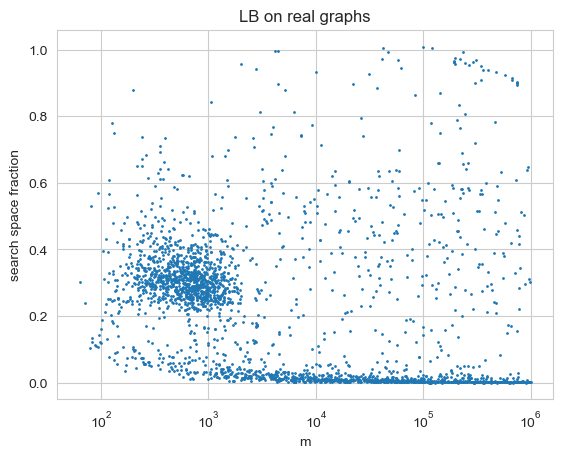

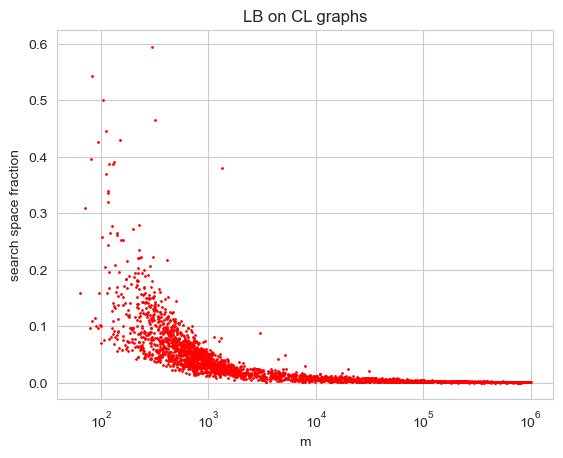

In [17]:
plt.figure()
plt.scatter(x, ssf_by_algos['LB'], s=1)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('search space fraction')
plt.title('LB on real graphs')

plt.figure()
plt.scatter(x, ssf_by_algos_cl['LB'], s=1, color='red')
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('search space fraction')
plt.title('LB on CL graphs')



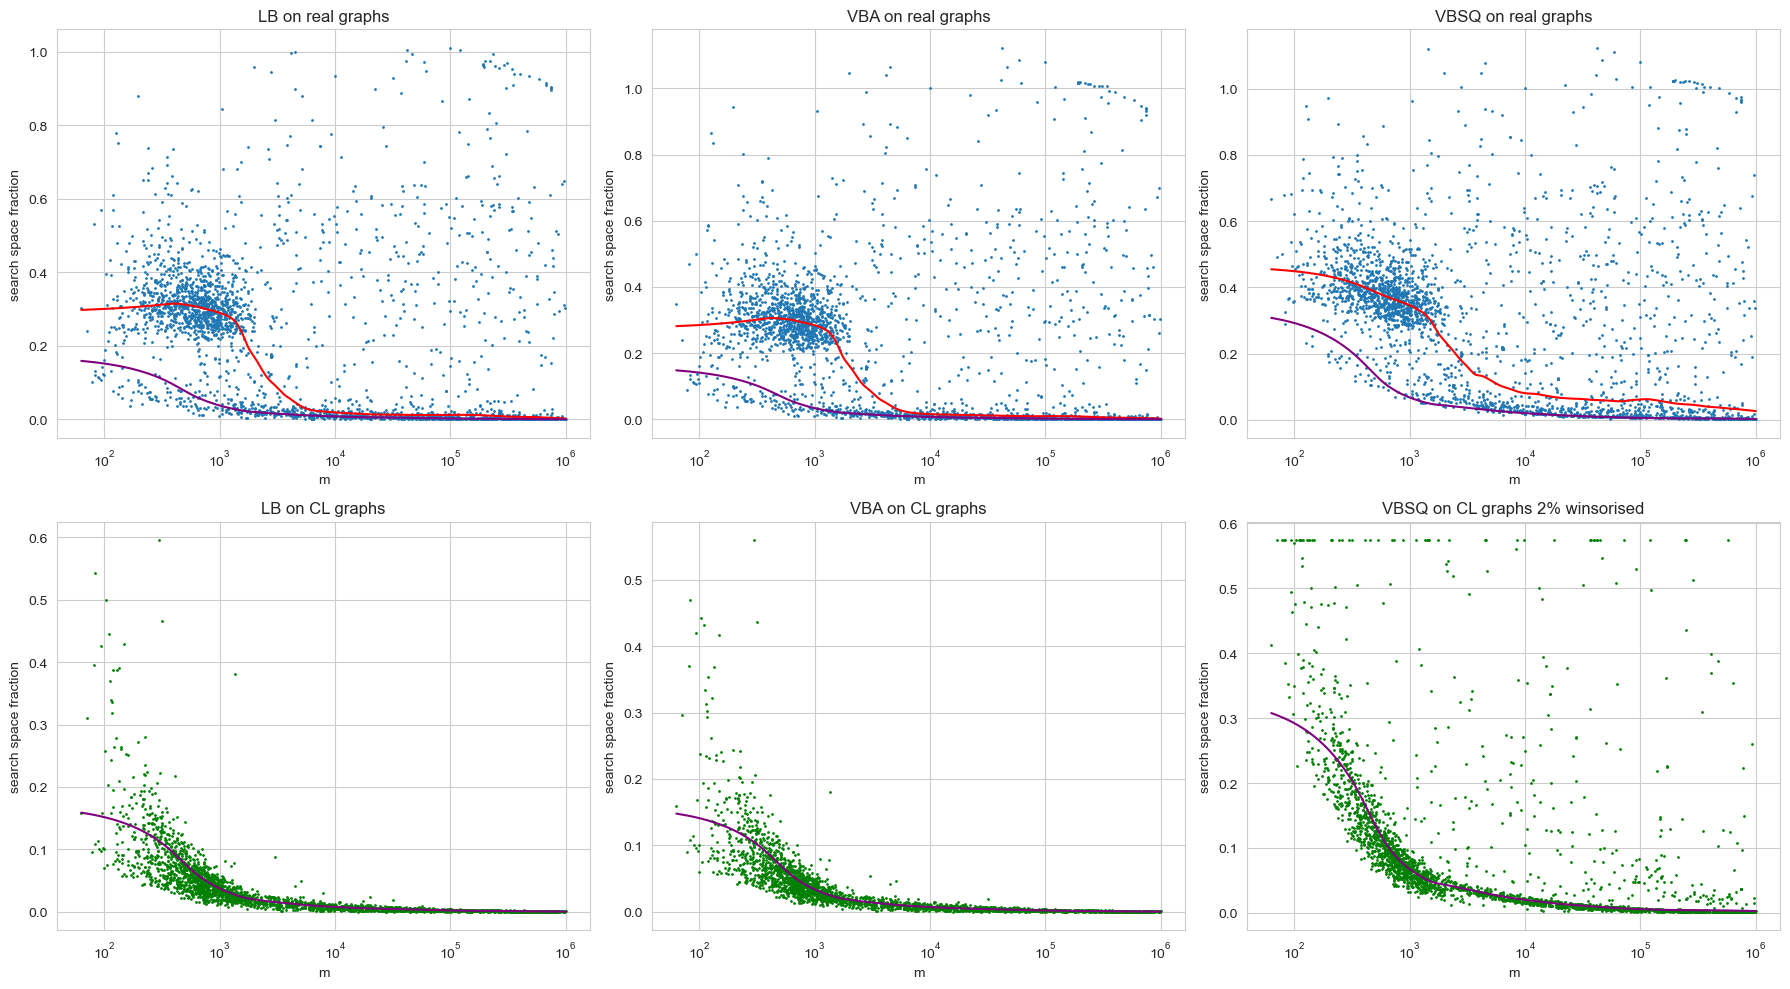

In [72]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Plot LB on real graphs
axs[0, 0].scatter(x, ssf_by_algos['LB'], s=1)
axs[0, 0].set_xscale('log')
axs[0, 0].set_xlabel('m')
axs[0, 0].set_ylabel('search space fraction')
axs[0, 0].set_title('LB on real graphs')

z = lowess(ssf_by_algos['LB'], x, frac=0.3)
axs[0, 0].plot(z[:, 0], z[:, 1], 'red')

# Plot VBA on real graphs
axs[0, 1].scatter(x, ssf_by_algos['VBA'], s=1)
axs[0, 1].set_xscale('log')
axs[0, 1].set_xlabel('m')
axs[0, 1].set_ylabel('search space fraction')
axs[0, 1].set_title('VBA on real graphs')

z = lowess(ssf_by_algos['VBA'], x, frac=0.3)
axs[0, 1].plot(z[:, 0], z[:, 1], 'red')

# Plot VBSQ on real graphs
axs[0, 2].scatter(x, ssf_by_algos['VBSQ'], s=1)
axs[0, 2].set_xscale('log')
axs[0, 2].set_xlabel('m')
axs[0, 2].set_ylabel('search space fraction')
axs[0, 2].set_title('VBSQ on real graphs')

z = lowess(ssf_by_algos['VBSQ'], x, frac=0.3)
axs[0, 2].plot(z[:, 0], z[:, 1], 'red')

# Plot LB on CL graphs
axs[1, 0].scatter(x, ssf_by_algos_cl['LB'], s=1, color='green')
axs[1, 0].set_xscale('log')
axs[1, 0].set_xlabel('m')
axs[1, 0].set_ylabel('search space fraction')
axs[1, 0].set_title('LB on CL graphs')

z = lowess(ssf_by_algos_cl['LB'], x, frac=0.3)
axs[0, 0].plot(z[:, 0], z[:, 1], 'purple')
axs[1, 0].plot(z[:, 0], z[:, 1], 'purple')

# Plot VBA on CL graphs
axs[1, 1].scatter(x, ssf_by_algos_cl['VBA'], s=1, color='green')
axs[1, 1].set_xscale('log')
axs[1, 1].set_xlabel('m')
axs[1, 1].set_ylabel('search space fraction')
axs[1, 1].set_title('VBA on CL graphs')

z = lowess(ssf_by_algos_cl['VBA'], x, frac=0.3)
axs[0, 1].plot(z[:, 0], z[:, 1], 'purple')
axs[1, 1].plot(z[:, 0], z[:, 1], 'purple')

# Plot VBSQ on CL graphs
y = ssf_by_algos_cl['VBSQ']
y = winsorize(y, limits=[0.05, 0.02])
axs[1, 2].scatter(x, y, s=1, color='green')
axs[1, 2].set_xscale('log')
axs[1, 2].set_xlabel('m')
axs[1, 2].set_ylabel('search space fraction')
axs[1, 2].set_title('VBSQ on CL graphs 2% winsorised')

z = lowess(y, x, frac=0.3)
axs[0, 2].plot(z[:, 0], z[:, 1], 'purple')
axs[1, 2].plot(z[:, 0], z[:, 1], 'purple')
# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'm')

Text(0, 0.5, 'VBA search space fraction')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'm')

Text(0, 0.5, 'VBA search space fraction on CL graphs')

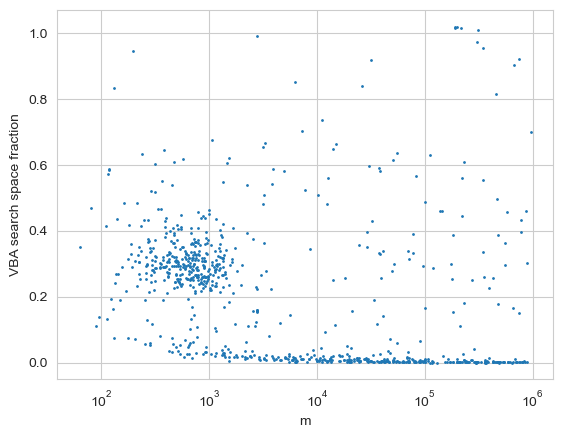

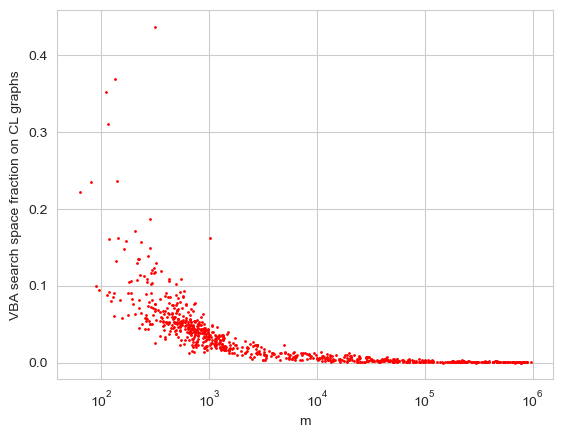

In [74]:
plt.figure()
plt.scatter(x, ssf_by_algos['VBA'], s=1)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('VBA search space fraction')

plt.figure()
plt.scatter(x, ssf_by_algos_cl['VBA'], s=1, color='red')
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('VBA search space fraction on CL graphs')

Text(0.5, 0, 'm')

Text(0, 0.5, 'VBA search space fraction ylmmed')

(0.0, 0.1)

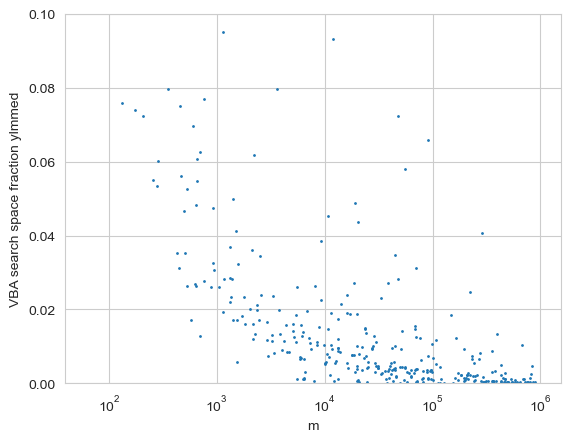

In [49]:
plt.scatter(x, ssf_by_algos['VBA'], s=1)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('VBA search space fraction ylmmed')
plt.ylim(0, 0.1)

Text(0.5, 0, 'm')

Text(0, 0.5, 'VBA search_space / LB search_space on real graphs')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'm')

Text(0, 0.5, 'VBA search_space / LB search_space on CL graphs')

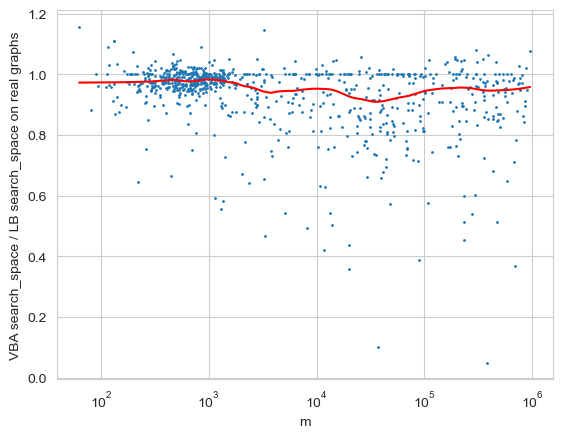

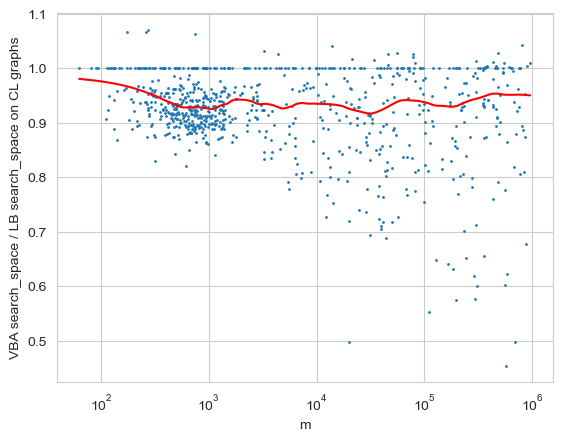

In [76]:
y = ss_by_algos['VBA'] / ss_by_algos['LB']

plt.scatter(x, y, s=1)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('VBA search_space / LB search_space on real graphs')

# nonparametric fit of previous graph
z = lowess(y, x, frac=0.2)
plt.plot(z[:, 0], z[:, 1], 'red')


plt.figure()
y = ss_by_algos_cl['VBA'] / ss_by_algos_cl['LB']
plt.scatter(x, y, s=1)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('VBA search_space / LB search_space on CL graphs')

z = lowess(y, x, frac=0.2)
plt.plot(z[:, 0], z[:, 1], 'red')

Text(0.5, 0, 'm')

Text(0, 0.5, 'EBA search_space / LB search_space on real graphs')

(0.0, 2.0)

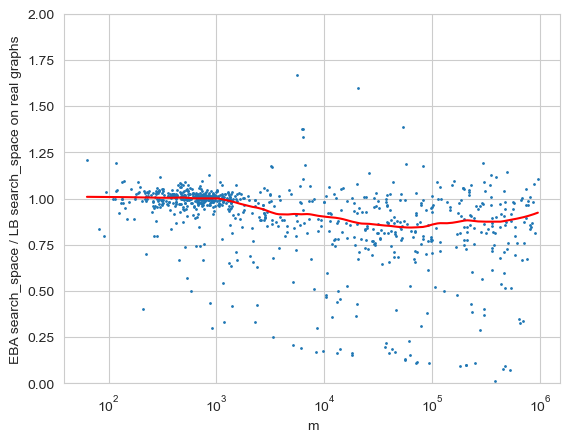

In [39]:
med_vba_ratio_to_lb = ss_by_algos['EBA'] / ss_by_algos['LB']

plt.scatter(x, med_vba_ratio_to_lb, s=1)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('EBA search_space / LB search_space on real graphs')

# nonparametric fit of previous graph
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
z = lowess(med_vba_ratio_to_lb, x, frac=0.2)
plt.plot(z[:, 0], z[:, 1], 'red')

plt.ylim(0, 2)


Text(0.5, 0, 'm')

Text(0, 0.5, 'VBSQ search_space / LB search_space on real graphs')

(0.0, 3.0)

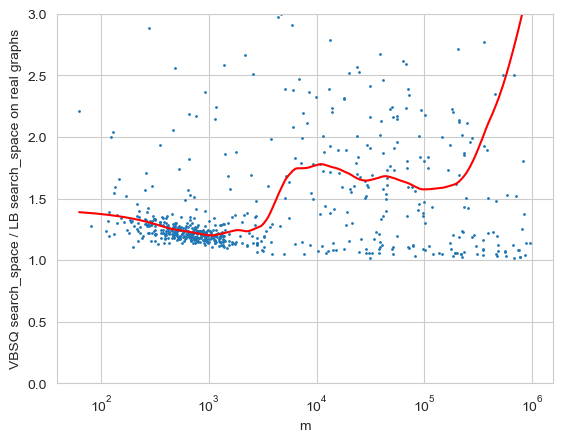

In [35]:
y = ss_by_algos['VBSQ'] / ss_by_algos['LB']

plt.scatter(x, y, s=1)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('VBSQ search_space / LB search_space on real graphs')

# nonparametric fit of previous graph
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

from scipy.stats.mstats import winsorize
y2 = winsorize(y, limits=[0.1, 0.1])

z = lowess(y2, x, frac=0.3)
plt.plot(z[:, 0], z[:, 1], 'red')

plt.ylim(0, 3)

# There are some really big outliers...

Text(0.5, 0, 'm')

Text(0, 0.5, 'VBA search_space / LB search_space on real graphs')

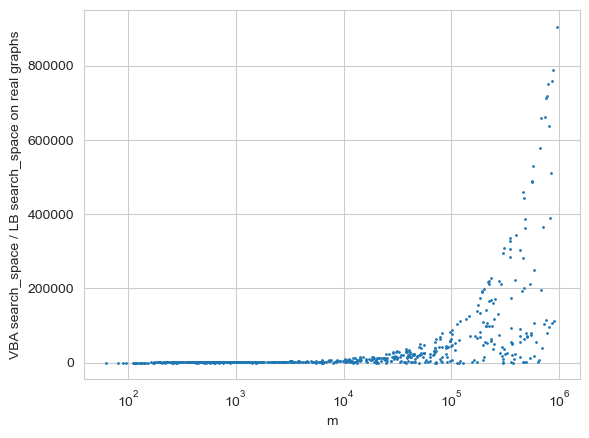

In [41]:
med_vba_ratio_to_lb = ss_by_algos['VBA'] / ssf_by_algos['VBSQ']

plt.scatter(x, med_vba_ratio_to_lb, s=1)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('VBA search_space / LB search_space on real graphs')


Text(0.5, 0, 'm')

Text(0, 0.5, 'LB search_space_frac - VBA search_space_frac on real graphs')

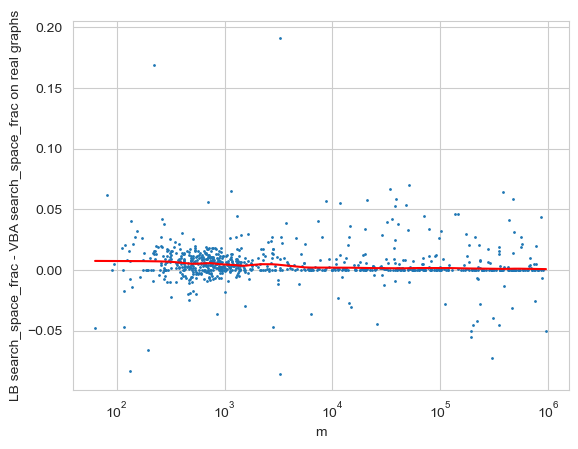

In [43]:
y = ssf_by_algos['LB'] - ssf_by_algos['VBA']

plt.scatter(x, y, s=1)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('LB search_space_frac - VBA search_space_frac on real graphs')

# nonparametric fit of previous graph
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
z = lowess(y, x, frac=0.2)
plt.plot(z[:, 0], z[:, 1], 'red')


Text(0.5, 0, 'm')

Text(0, 0.5, 'VBSQ search_space_frac - VBA search_space_frac on real graphs')

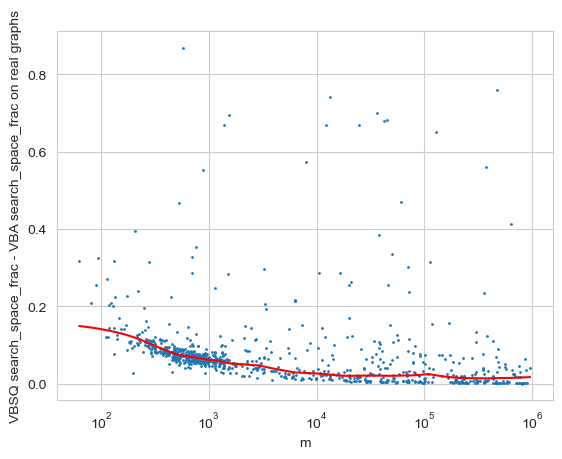

In [44]:
y = ssf_by_algos['VBSQ'] - ssf_by_algos['VBA']

plt.scatter(x, y, s=1)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('VBSQ search_space_frac - VBA search_space_frac on real graphs')

# nonparametric fit of previous graph
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
z = lowess(y, x, frac=0.2)
plt.plot(z[:, 0], z[:, 1], 'red')


In [285]:
# plt.scatter(x[y < 0.4], y[y<0.4], s=1)
# plt.xscale('log')
# plt.xlabel('m')
# plt.ylabel('VBSQ - VBA on real graphs: only points with difference < 0.4')

Text(0.5, 0, 'm')

Text(0, 0.5, 'VBSQ on real graphs')

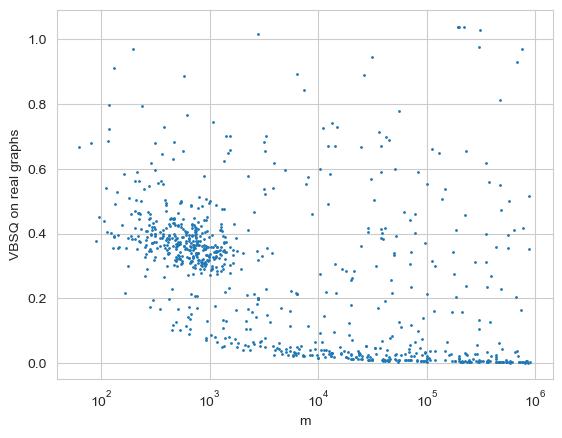

In [280]:
med_vbsq = ssf_by_algos['VBSQ'][idx_by_size]
plt.scatter(x, med_vbsq, s=1)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('VBSQ on real graphs')

In [323]:
perc = np.percentile(med_vbsq_minus_vba / med_vbsq, np.linspace(0, 100, 100))
arr = med_vbsq_minus_vba / med_vbsq
np.percentile(arr, 20)
np.percentile(arr, 80)
np.percentile(arr, [20, 80])

0.16666666666666663

0.7343772715000731

array([0.16666667, 0.73437727])

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'search space fraction')

<AxesSubplot:>

Text(0, 0.5, 'percentile')

Text(0.5, 1.0, 'VBSQ - VBA / VBSQ on real graphs')

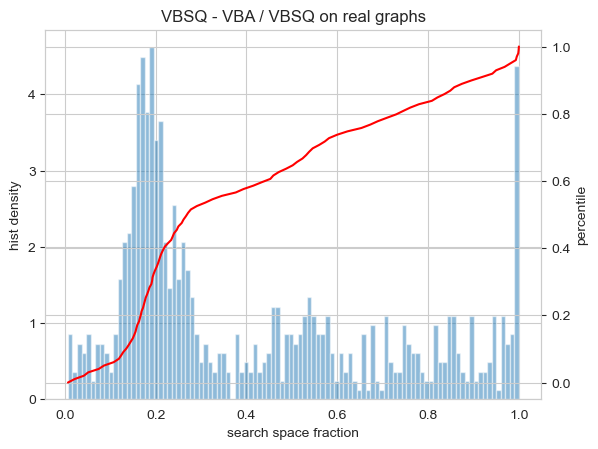

In [328]:
# hist and percentile plot of med_vbsq_minus_vba / med_vbsq all on the same axis
import matplotlib.pyplot as plt
plt.figure()
_ = plt.hist(med_vbsq_minus_vba / med_vbsq, bins=100, alpha=0.5, density=True)
_ = plt.ylabel('hist density')
plt.xlabel('search space fraction')
# plt.scatter([0.5, 0.5], [0, 1], color='red')
search_fraction_for_perc = np.percentile(med_vbsq_minus_vba / med_vbsq, np.linspace(0, 100, 100))
# plot this on the same plot but with a different scale

plt.twinx()
_ = plt.plot(search_fraction_for_perc, np.linspace(0, 1, 100), color='red')

# plt.plot(4*np.percentile(med_vbsq_minus_vba / med_vbsq, np.linspace(0, 100, 100)))
plt.ylabel('percentile')
plt.title('VBSQ - VBA / VBSQ on real graphs')
plt.show()

(array([ 16.,  17.,  17.,  41.,  96., 109.,  67.,  56.,  23.,  15.,  11.,
         14.,  13.,  24.,  20.,  27.,  26.,  19.,  13.,  10.,  12.,  17.,
         18.,  13.,  16.,  24.,  15.,  10.,  18.,  52.]),
 array([0.00680498, 0.03991052, 0.07301606, 0.10612161, 0.13922715,
        0.17233269, 0.20543823, 0.23854377, 0.27164932, 0.30475486,
        0.3378604 , 0.37096594, 0.40407148, 0.43717702, 0.47028257,
        0.50338811, 0.53649365, 0.56959919, 0.60270473, 0.63581027,
        0.66891582, 0.70202136, 0.7351269 , 0.76823244, 0.80133798,
        0.83444353, 0.86754907, 0.90065461, 0.93376015, 0.96686569,
        0.99997123]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'VBSQ - VBA / VBSQ on real graphs')

Text(0.5, 0, 'search space fraction')

Text(0, 0.5, 'count (actually only 1000 graphs)')

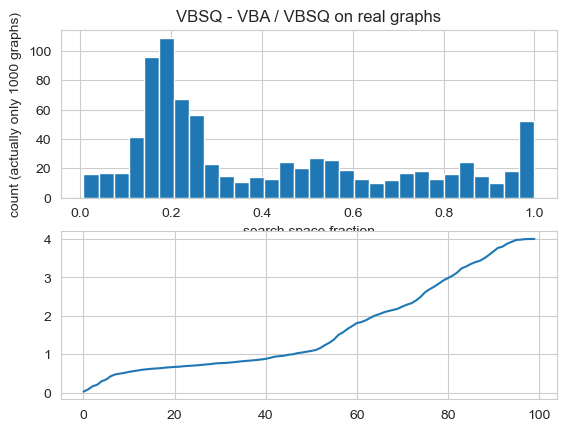

In [306]:
fig, ax = plt.subplots(2)
ax[0].hist(med_vbsq_minus_vba / med_vbsq, bins=30)
ax[0].set_title('VBSQ - VBA / VBSQ on real graphs')
ax[0].set_xlabel('search space fraction')
ax[0].set_ylabel('count (actually only 1000 graphs)')
# do a percentile plot
ax[1].plot(4*np.percentile(med_vbsq_minus_vba / med_vbsq, np.linspace(0, 100, 100)))

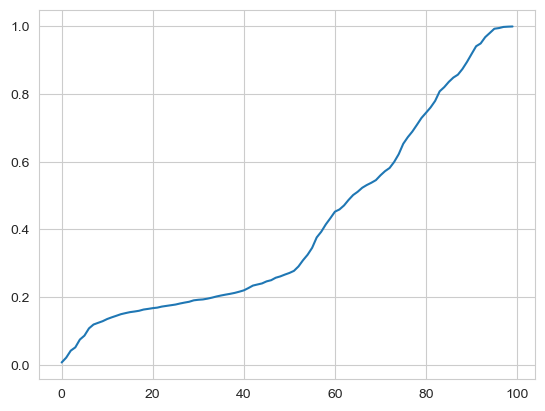

In [292]:
# do a percentile plot
plt.plot(np.percentile(med_vbsq_minus_vba / med_vbsq, np.linspace(0, 100, 100)))

## Median runtime against deviation

In [273]:
graph_algo_medians

,graph,algo,search_space,m,search_space_fraction
0,145bit,EBA,23.0,11251.0,0.002044
1,145bit,VBA,25.0,11251.0,0.002222
2,145bit,VBDE,25.0,11251.0,0.002222
3,145bit,VBSQ,1642.0,11251.0,0.145943
4,145bit_cl,EBA,20.0,11251.0,0.001778
...,...,...,...,...,...
6627,webkb-wisc,VBSQ,103.0,450.0,0.228889
6628,webkb-wisc_cl,EBA,22.0,450.0,0.048889
6629,webkb-wisc_cl,VBA,21.0,450.0,0.046667
6630,webkb-wisc_cl,VBDE,24.0,450.0,0.053333


In [274]:
a = graph_algo_medians.loc[~graph_algo_medians.graph.str.contains('_cl')]
b = graph_algo_medians.loc[graph_algo_medians.graph.str.contains('_cl')]
a = a.reset_index(drop=True)
b = b.reset_index(drop=True)
c = a.loc[a.algo == 'VBA'].search_space_fraction - b.loc[b.algo == 'VBA'].search_space_fraction
d = a.loc[a.algo == 'VBA'].m

Text(0.5, 0, 'm')

Text(0, 0.5, 'search space fraction difference - VBA real - VBA CL counterpart')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'percentile')

Text(0, 0.5, 'search space fraction difference - VBA real - VBA CL counterpart')

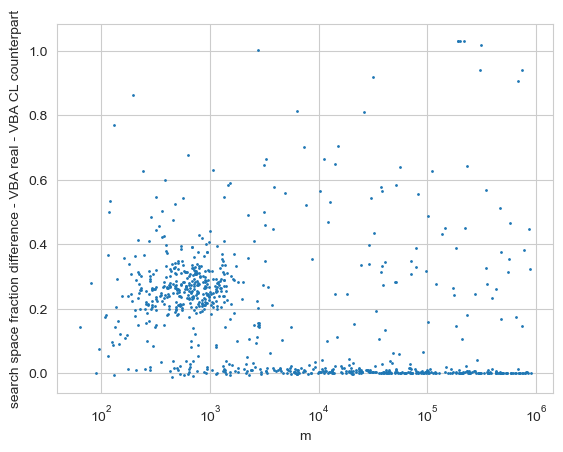

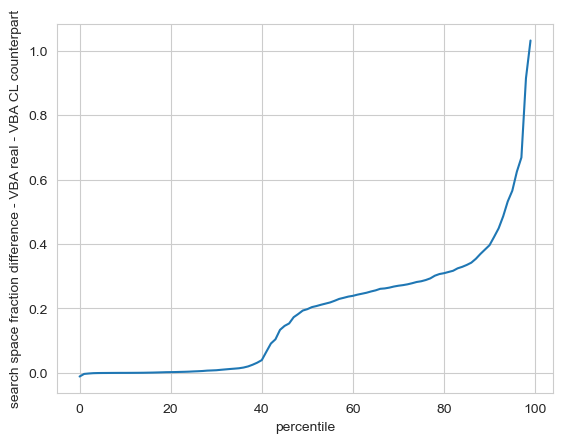

In [275]:
plt.scatter(d, c, s=1)
# plt.scatter(rand_jitter(d), c)
plt.xlabel('m')
plt.ylabel('search space fraction difference - VBA real - VBA CL counterpart')
plt.xscale('log')

plt.figure()

# c percentile plot
plt.plot(np.percentile(c, np.linspace(0, 100, 100)))
plt.xlabel('percentile')
plt.ylabel('search space fraction difference - VBA real - VBA CL counterpart')

In [276]:
c2, y2 = c.reset_index(), y.reset_index()

(-0.1, 1.0)

Text(0.5, 0, 'search space fraction difference - VBA real - VBA CL counterpart')

Text(0, 0.5, 'VBSQ - VBA on real graphs')

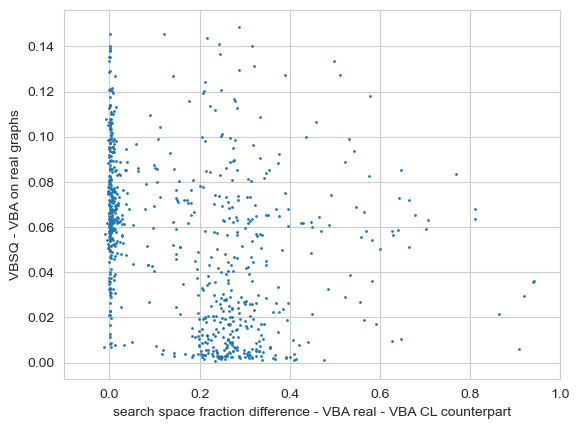

In [278]:
plt.scatter(c2[y2<0.15], y2[y2<0.15], s=1)
plt.xlim(-0.1, 1)
plt.xlabel('search space fraction difference - VBA real - VBA CL counterpart')
plt.ylabel('VBSQ - VBA on real graphs')

In [266]:
(y2<0.1).sum()

index                      1
search_space_fraction    721
dtype: int64

(array([316.,  24.,  12.,  16.,  23.,  27.,  65.,  91.,  78.,  62.,  24.,
         17.,  11.,  11.,   6.,   7.,   9.,   4.,   7.,   3.,   2.,   0.,
          1.,   2.,   0.,   1.,   2.,   2.,   0.,   6.]),
 array([-0.01111111,  0.02364294,  0.05839699,  0.09315103,  0.12790508,
         0.16265913,  0.19741318,  0.23216723,  0.26692128,  0.30167533,
         0.33642938,  0.37118342,  0.40593747,  0.44069152,  0.47544557,
         0.51019962,  0.54495367,  0.57970772,  0.61446176,  0.64921581,
         0.68396986,  0.71872391,  0.75347796,  0.78823201,  0.82298606,
         0.8577401 ,  0.89249415,  0.9272482 ,  0.96200225,  0.9967563 ,
         1.03151035]),
 <BarContainer object of 30 artists>)

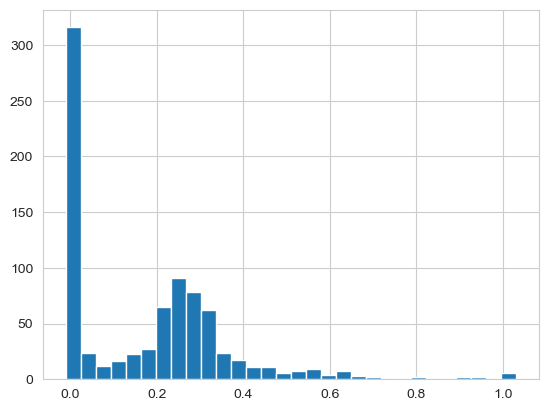

In [247]:
plt.hist(c, bins=30)

(array([727.,  50.,  18.,  11.,   3.,   5.,   3.,   1.,   0.,   1.,   1.,
          0.,   3.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.10446324, 0.20892648, 0.31338972, 0.41785296,
        0.52231619, 0.62677943, 0.73124267, 0.83570591, 0.94016915,
        1.04463239, 1.14909563, 1.25355887, 1.35802211, 1.46248534,
        1.56694858, 1.67141182, 1.77587506, 1.8803383 , 1.98480154,
        2.08926478, 2.19372802, 2.29819126, 2.40265449, 2.50711773,
        2.61158097, 2.71604421, 2.82050745, 2.92497069, 3.02943393,
        3.13389717]),
 <BarContainer object of 30 artists>)

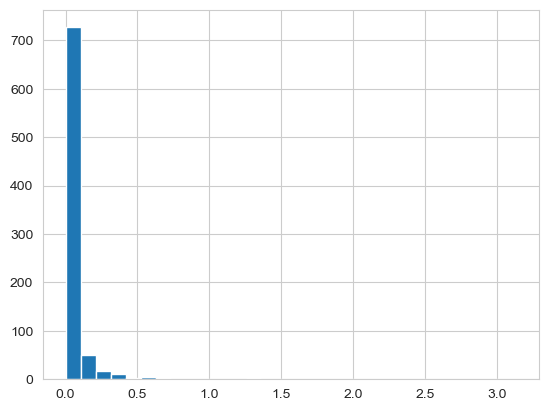

In [248]:
plt.hist(y, bins=30)

In [185]:
a.loc[a.algo == 'VBA'].search_space_fraction

1       0.001955
5       0.001498
9       0.013619
13      0.008439
17      0.022246
          ...   
1097    0.000199
1101    0.008015
1105    0.000183
1109    0.003084
1113    0.001173
Name: search_space_fraction, Length: 279, dtype: float64

In [186]:
b.loc[b.algo == 'VBA'].search_space_fraction

1       0.002222
5       0.001475
9       0.005837
13      0.321378
17      0.305085
          ...   
1097    0.000028
1101    0.013255
1105    0.002174
1109    0.013325
1113    0.919441
Name: search_space_fraction, Length: 279, dtype: float64

<AxesSubplot:>

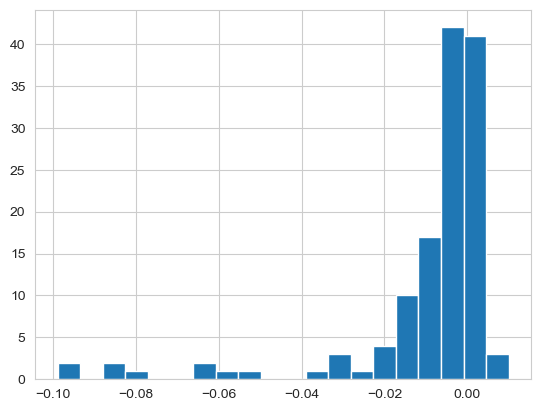

In [179]:
c.loc[c > -0.1].hist(bins=20)

In [240]:
y.shape

(829,)

In [242]:
c.shape

(829,)

In [125]:
import numpy as np
np.percentile(c, 90)

29.100000000000016

<AxesSubplot:>

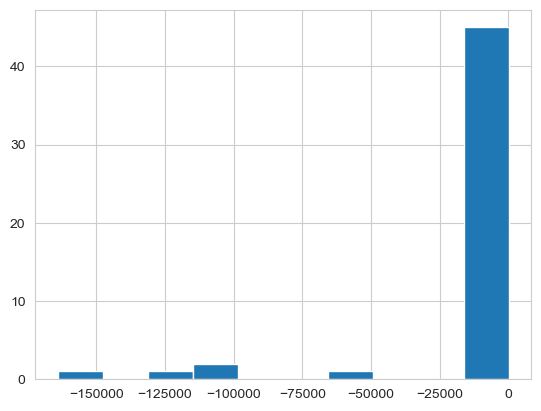

In [122]:
c.hist(bins)

## GIRGs investigation

In [107]:
utils.input_names_girg

['girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=321',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=321_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=356',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=356_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=489',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=489_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=64',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=64_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=836',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=836_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed=321',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed=321_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed=356',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed=356_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed=489',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed=489_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed=64',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed

## Multi hist plots

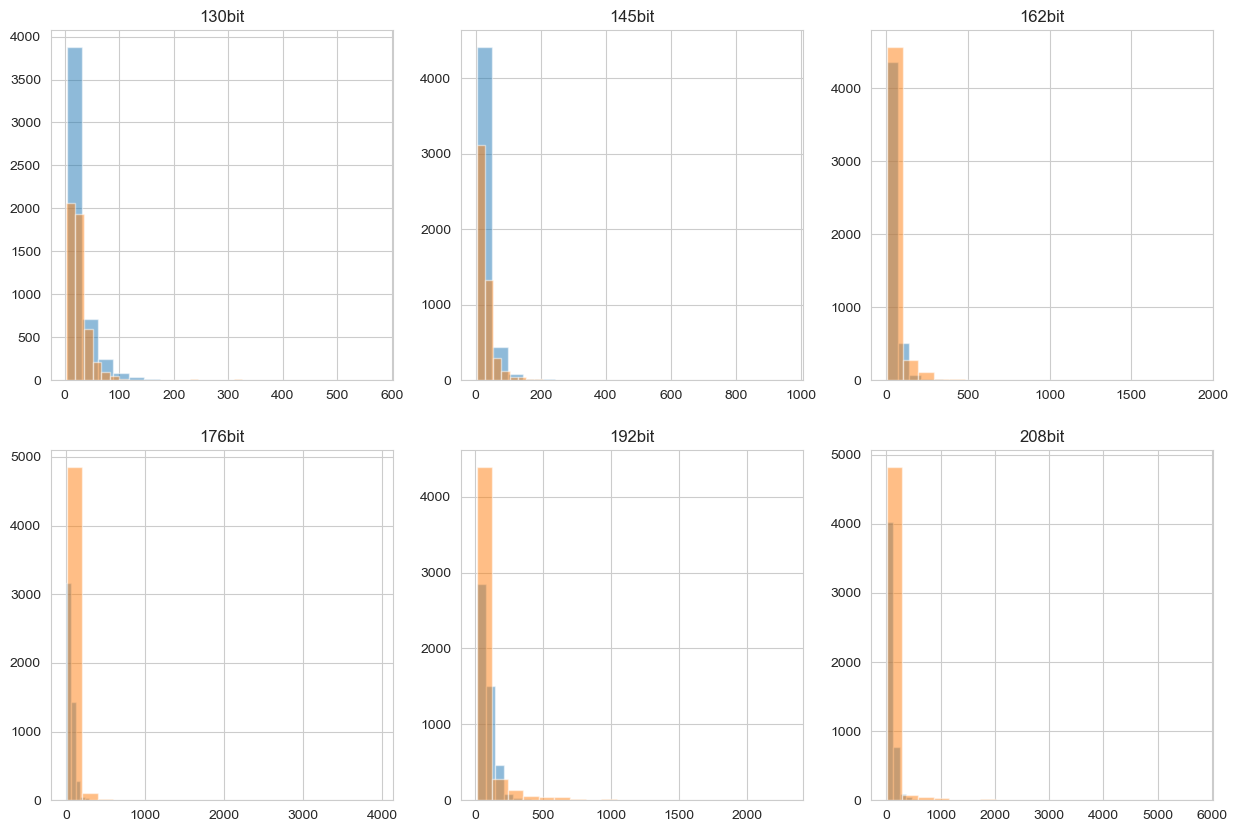

In [21]:
# plot the same for the first 6 graphs
graphs = utils.input_names_real_with_cl[:50]

dfs = []
for graph in graphs:
    df = utils.graph_name_to_resultsdf(graph)
    dfs.append(df)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, df in enumerate(dfs):
    _ = ax = axs[i // 3, i % 3]
    _ = df.loc[(df.algo == 'VBA') & (df.graph.str.contains('_cl')),
           'search_space'].hist(bins=20, ax=ax, alpha=0.5)
    _ = df.loc[(df.algo == 'VBA') & (~df.graph.str.contains('_cl')),
        'search_space'].hist(bins=20, ax=ax, alpha=0.5)
    _ = ax.set_title(graphs[i])

In [4]:
import glob
csvs = glob.glob(utils.p + 'real_fake_output/*')
import tqdm
dfs = []
for csv in tqdm.tqdm(csvs):
    df = pd.read_csv(csv)
    dfs.append(df)


100%|██████████| 2705/2705 [01:11<00:00, 38.08it/s]


In [5]:
df = pd.concat(dfs)

In [9]:
df.loc[df.graph == 'DD_g488'].shape

(40000, 7)

In [10]:
40000/4

10000.0

In [12]:
x = df.loc[df.graph == 'DD_g488'].algo

In [13]:
x.iloc[4999:5001]

4999    python-BiBFS_VertexBalancedApproximate
5000    python-BiBFS_VertexBalancedApproximate
Name: algo, dtype: object

In [14]:
x.iloc[9999:10001]

9999     python-BiBFS_VertexBalancedApproximate
10000      python-BiBFS_ExactExpandSmallerQueue
Name: algo, dtype: object

In [18]:
fn = f'{utils.p}real_fake_output/130bit.csv'
gams = pd.read_csv(fn)

In [24]:
gams.columns

Index(['s', 't', 'algo', 'search_space', 'dist', 'time_dist', 'graph'], dtype='object')

In [15]:
utils.input_names_real_with_cl[:10]

['130bit',
 '145bit',
 '162bit',
 '176bit',
 '192bit',
 '208bit',
 '2D_27628_bjtcai',
 '2D_54019_highK',
 '2cubes_sphere',
 '3D_28984_Tetra']